In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
print pd.__version__

0.24.2


In [3]:
data_raw = pd.read_csv("trips.csv", names=['zone_i', 'zone_j', 'n_livers_i_to_j', 'avg_travel_time', 'avg_distance_to_work'])
data = data_raw[data_raw.n_livers_i_to_j > 0]
print data.shape
data.head(20)

(210, 5)


,zone_i,zone_j,n_livers_i_to_j,avg_travel_time,avg_distance_to_work
0,1,1,40,26,2.2
1,1,2,4,49,8.1
2,1,3,3,35,6.8
3,1,4,2,75,9.3
4,1,5,2,30,8.0
5,1,6,4,52,9.9
6,1,7,6,48,13.0
7,1,8,3,48,12.3
8,1,11,1,30,16.9
9,1,13,2,50,21.9


*TODO* применить алгоритм!

In [11]:
def count_F(A, B, df):
    n = df.shape[0]
    F = []

    O = np.array([df.n_livers_i_to_j[df.zone_i==i].sum() for i in df.zone_i])
    print O
            
    D = np.array([df.n_livers_i_to_j[df.zone_j==j].sum() for j in df.zone_j])
    print D
    
    
    F = [float(df.avg_travel_time[k]) / (A * B * O[k] * D[k]) for k in range(n)]
    return F


In [12]:
?plt.scatter

In [15]:
def plot_log_F(df, F):
    F_log = -np.log(F)
    plt.scatter(x=df.avg_travel_time, y=F_log, alpha=0.64)
    plt.show()

In [9]:
F = count_F(1, 1, data)
print F

[ 67  67  67  67  67  67  67  67  67  67 122 122 122 122 122 122 122 122
 122 122 122 126 126 126 126 126 126 126 126 126 126 126 126 126  98  98
  98  98  98  98  98  98  98  98  98 113 113 113 113 113 113 113 113 113
 113 113 113 116 116 116 116 116 116 116 116 116 116 116 116 116 128 128
 128 128 128 128 128 128 128 128 128 128 128 128 118 118 118 118 118 118
 118 118 118 118 118 118  83  83  83  83  83  83  83  83  83  83  83  83
   7   7   7 124 124 124 124 124 124 124 124 124 124 124 245 245 245 245
 245 245 245 245 245 245 245 245 245 117 117 117 117 117 117 117 117 117
 117 117 117 117 117  87  87  87  87  87  87  87  87  87  87 118 118 118
 118 118 118 118 118 118 118 118 118  75  75  75  75  75  75  75  75  75
  67  67  67  67  67  67  67  66  66  66  66  66  66  66  66  66  46  46
  46  46  46  46   7   7   7  13  13  22  22  22]
[351 141 115 109 107 118 100 140  76  95 351 141 115 109 107 118 100 140
  63 158  84 351 141 115 109 107 118 100 140  63  76 158  60  84 351 141
 

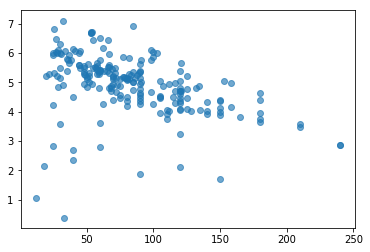

In [16]:
plot_log_F(data, F)